<a href="https://colab.research.google.com/github/lhartson03/psu_quants/blob/main/fin408_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Finance 408: Project 1**

Name: Liam Hartson

Notes: Recieved permission from professor to do this in python. See all answers in cell output.



In [ ]:
!pip install yfinance

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import random
import statsmodels.api as sm
from scipy.stats import linregress


yf.pdr_override()

In [2]:
def load_us_stock_data(tickerList, start_date, end_date):
  stocks_data = pd.DataFrame()
  stocks_data = pdr.get_data_yahoo(tickerList, start = start_date, end = end_date)['Adj Close']
  return stocks_data

**Question 1: Estimating Correlation between ETFs
SPY, LQD, SH, SDS, SSO, and SHV
August 2010 - June 2018**

SPY: Exchange traded fund managed by SSGA that seeks to track the performance of the S&P 500 Index. It is a cap weighted index and is the oldest ETF listed on US exchanges.

LQD: ETF managed by Blackrock that seeks to track the U.S. dollar denominated corporate investment grade bond index.

SH: Managed by ProShares, this ETF seeks a singular day -1x return of its benchmark the S&P 500.

SDS: Managed by ProShares, this leverageed ETF seeks a singular day -2x return of its benchmark the S&P 500.

SSO: Managed by ProShares, this leveraged ETF seeks a singular day 2x return of its benchmark the S&P 500.

SHV: Managed by Blackrock, SHV seeks to track the returns ICE short term treasury bond index. Tresury Bonds with maturities less than one year.

In [ ]:
etf_list = ['SPY', 'LQD', 'SH', 'SDS', 'SSO', 'SHV']

# get data
price_data = load_us_stock_data(etf_list,datetime(2010,8,1),datetime(2018,7,1))

# calculate daily returns
daily_returns = (price_data / price_data.shift(1))-1
monthly_returns_rolling = daily_returns.resample('M').apply(lambda x: (1 + x).prod() - 1)

# find monthly returns by multiplying average daily * 21 trading days per month
monthly_returns = daily_returns.mean()*21

# calculate correlation matrix
corr_matrix = daily_returns.corr()

print("\nMonthly Returns Decimal Form")
print(monthly_returns)

print("\nCorrelation Coefficient With SPY")
corr_matrix['SPY']

[*********************100%%**********************]  6 of 6 completed

Monthly Returns Decimal Form
LQD    0.003581
SDS   -0.023617
SH    -0.012029
SHV    0.000208
SPY    0.011813
SSO    0.022350
dtype: float64

Correlation Coefficient With SPY


LQD   -0.098175
SDS   -0.998760
SH    -0.997926
SHV   -0.042548
SPY    1.000000
SSO    0.998821
Name: SPY, dtype: float64

All Correlation Coefficients Make sense:



---



*   SDS, SH - both short SPX ETF's should be -1
*   SSO - long leverageed etf should be 1
*   LQD, SHV - bond asset classes, should not be highly correlated

**End of Question 1:**

In [ ]:
#dataframe with monthly returns
monthly_returns_rolling

,LQD,SDS,SH,SHV,SPY,SSO
Date,,,,,,
2010-08-31,0.030739,0.135969,0.068814,0.000273,-6.606940e-02,-0.130639
2010-09-30,0.004566,-0.162705,-0.084784,0.000263,8.955457e-02,0.184396
2010-10-31,-0.002629,-0.076377,-0.038650,-0.000009,3.820209e-02,0.075692
2010-11-30,-0.016152,-0.005854,-0.002552,-0.000009,2.220446e-16,-0.004015
2010-12-31,-0.007520,-0.125506,-0.065046,0.000354,6.685237e-02,0.139403
...,...,...,...,...,...,...
2018-02-28,-0.022372,0.065979,0.034603,0.000090,-3.636034e-02,-0.080723
2018-03-31,0.005568,0.045391,0.024967,0.001670,-2.741049e-02,-0.055434
2018-04-30,-0.015660,-0.010254,-0.003300,0.000934,5.168149e-03,0.001991


**Start Question 2**

SPY: Exchange traded fund managed by SSGA that seeks to track the performance of the S&P 500 Index. It is a cap weighted index and is the oldest ETF listed on US exchanges.

LQD: ETF managed by Blackrock that seeks to track the U.S. dollar denominated corporate investment grade bond index.


In [ ]:
portfolio = ['SPY', 'LQD']

portfolio_data = load_us_stock_data(portfolio,datetime(2010,8,1),datetime(2018,7,1))

daily_returns = (portfolio_data / portfolio_data.shift(1))-1

# caclulate monthly stv and mu
monthly_sd = daily_returns.std()*np.sqrt(21)
monthly_e_r = daily_returns.mean()*21

# calculate standard deviation and expected return
sd = daily_returns.std()*np.sqrt(250)
e_r = daily_returns.mean()*250
cov_matrix = daily_returns.cov()
print("Monthly Average returns\n",monthly_e_r,"\n\nMonthly Standard Deviations\n",monthly_sd,'\n\n')

print("Annualized Average returns\n",e_r,"\n\nAnnualized Standard Deviations\n",sd)

[*********************100%%**********************]  2 of 2 completed
Monthly Average returns
 LQD    0.003581
SPY    0.011813
dtype: float64 

Monthly Standard Deviations
 LQD    0.015396
SPY    0.041112
dtype: float64 


Annualized Average returns
 LQD    0.042629
SPY    0.140629
dtype: float64 

Annualized Standard Deviations
 LQD    0.053120
SPY    0.141851
dtype: float64


In [ ]:
print('Correlation between SPY & LQD: ',round(daily_returns['SPY'].corr(daily_returns['LQD']),4))

Correlation between SPY & LQD:  -0.0982


In [ ]:
# Instead of incremental weights this uses a monte carlo method to generate feasible portfolios
# Sampling from a dirichlet distribution
p_ret = []
p_weights = []
p_vol = []

# set no. of assets and portfolios to simulate
num_assets = len(portfolio_data.columns)
num_portfolios = 1000

# for each random portfolio, find the return and volatility
for portfolio in range(num_portfolios):
    weights = np.random.dirichlet(np.ones(num_assets), size=1)[0]
    # ScaleS the weights to fit your desired range, e.g., -1 to 1
    min_weight = -0.5
    max_weight = 1.5
    weights = min_weight + (max_weight - min_weight) * weights
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights,e_r)
    p_ret.append(returns)
    var = cov_matrix.mul(weights,axis=0).mul(weights,axis=1).sum().sum()
    ann_sd = np.sqrt(var*250)
    p_vol.append(ann_sd)

data = {'returns': p_ret, 'volatility': p_vol}
for counter, symbol in enumerate(portfolio_data.columns.tolist()):
    data[symbol + '_weight'] = [w[counter] for w in p_weights]
portfolios = pd.DataFrame(data)

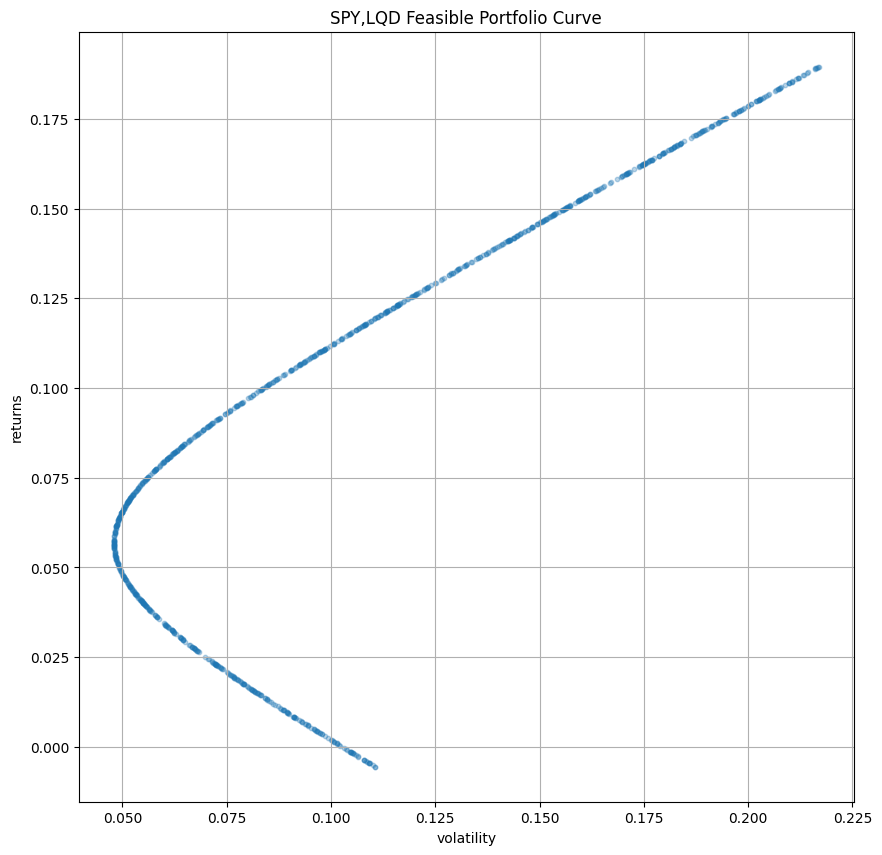

In [ ]:
portfolios.plot.scatter(x='volatility',y='returns',grid=True,marker='o', s=10, alpha=0.3,figsize=[10,10])
plt.title('SPY,LQD Feasible Portfolio Curve');

In [ ]:
print('tabluated portfolios')
print(portfolios[['returns', 'volatility','LQD_weight','SPY_weight']])

tabluated portfolios
      returns  volatility  LQD_weight  SPY_weight
0    0.004823    0.095939    1.385770   -0.385770
1    0.162295    0.174756   -0.221083    1.221083
2    0.047333    0.050360    0.951995    0.048005
3    0.164752    0.178528   -0.246160    1.246160
4    0.183561    0.207575   -0.438088    1.438088
..        ...         ...         ...         ...
995  0.027816    0.066756    1.151149   -0.151149
996  0.019452    0.076631    1.236498   -0.236498
997  0.082674    0.063160    0.591369    0.408631
998  0.030487    0.063869    1.123899   -0.123899
999  0.182880    0.206518   -0.431133    1.431133

[1000 rows x 4 columns]


**End Question 2**

**Start Question 3**

In [ ]:
RF = 0.02
min_var_port = portfolios.loc[portfolios['volatility'].idxmin()]
min_var_port['sharpe'] = (min_var_port['returns']-RF)/min_var_port['volatility']
portfolios['sharpe'] = (portfolios['returns']-RF)/portfolios['volatility']
sharpe_max = portfolios.loc[portfolios['sharpe'].idxmax()]

In [ ]:
volatility_values = portfolios['volatility'].values  # Assuming 'volatility' and 'returns' are column names in your DataFrame
x=0
y_values = []
x_values = []
while x < max(portfolios['volatility'].values):
  y_values.append((sharpe_max[4] * x) + RF)
  x_values.append(x)
  x+=0.01

In [ ]:
print('Annual average return\n', e_r, '\n\nAnnualized average stdv\n',sd)

Annual average return
 LQD    0.042629
SPY    0.140629
dtype: float64 

Annualized average stdv
 LQD    0.053120
SPY    0.141851
dtype: float64




Tangency Portfolio
returns       0.081514
volatility    0.061973
LQD_weight    0.603208
SPY_weight    0.396792
sharpe        0.992599
Name: 987, dtype: float64


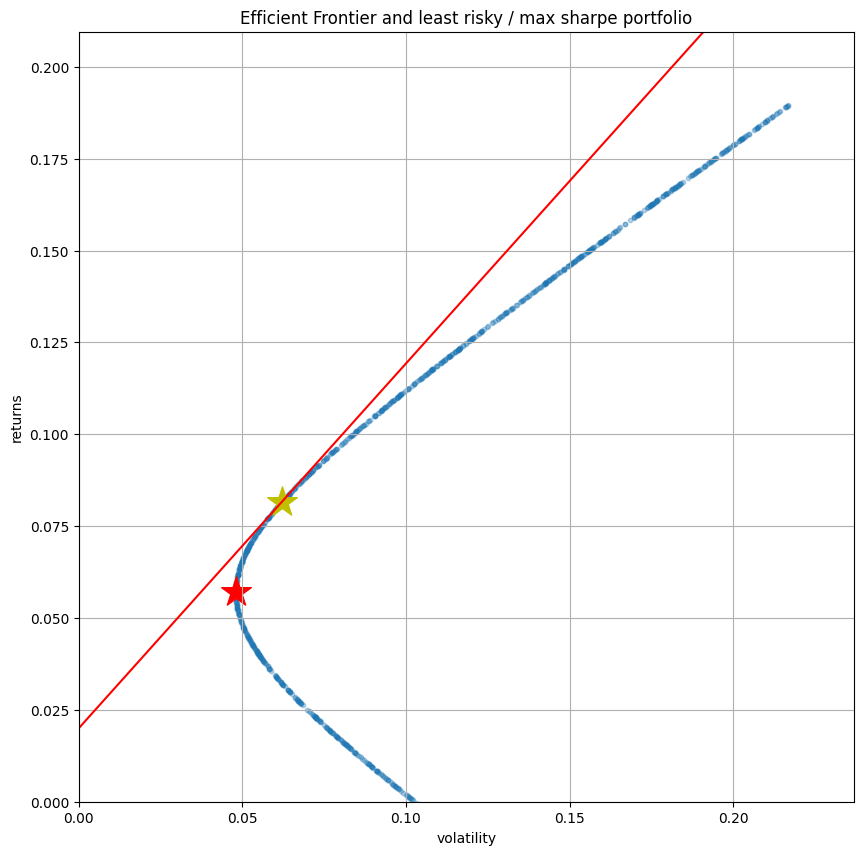

In [ ]:
portfolios.plot.scatter(x='volatility',y='returns',grid=True,\
                        marker='o', s=10, alpha=0.3,figsize=[10,10])
plt.xlim(0, max(volatility_values)+0.02)
plt.ylim(0,max(portfolios['returns'].values)+0.02)

plt.scatter(x=min_var_port[1],y=min_var_port[0],\
            color='r', marker='*', s=500);
plt.scatter(x=sharpe_max[1],y=sharpe_max[0],\
            color='y', marker='*', s=500);
plt.title('Efficient Frontier and least risky / max sharpe portfolio');
plt.plot(x_values, y_values, label="CAL", color='r')
print("\n\nTangency Portfolio")
print(sharpe_max)

In [ ]:
a = [8,12,16]
print('           T-BIll | Stocks | Bonds')
for n in range(0,len(a)):
  sigma = sharpe_max[1]
  Y = (sharpe_max[0]-RF)/(a[n]*(sigma**2))
  w_t_bill = 1- Y
  w_stocks = sharpe_max[3]*Y
  w_bonds = sharpe_max[2]*Y
  #print("Investor " + str(n+1) ,round(w_t_bill,2),round(w_stocks,2),round(w_bonds,2))
  print(f"Investor {n+1}: {w_t_bill*100:.2f}%, {w_stocks*100:.2f}%, {w_bonds*100:.2f}%")
  print("Investor {}: ${:.2f}, ${:.2f}, ${:.2f}".format(n+1, w_t_bill*10000, w_stocks*10000, w_bonds*10000),"\n")



           T-BIll | Stocks | Bonds
Investor 1: -100.21%, 79.44%, 120.77%
Investor 1: $-10020.85, $7944.11, $12076.74 

Investor 2: -33.47%, 52.96%, 80.51%
Investor 2: $-3347.24, $5296.08, $8051.16 

Investor 3: -0.10%, 39.72%, 60.38%
Investor 3: $-10.43, $3972.06, $6038.37 



**Question 4**


---



*   VOO: Managed by Vangaurd, this fund seeks to track the return of the S&P 500 index.
*   VMNFX: Managed by vanguard, this funds goal is to nuteralize the effect of stock market movement on returns.
*   XLP: Represents the consumer statles sector of the S&P 500. Seeks to track the results of the index.
*   XLY: Represents the consumer discretionary sector of the S&P 500. Seeks to track the results of the index.
*   SSO: Managed by ProShares, this leveraged ETF seeks a singular day 2x return of its benchmark the S&P 500.

In [3]:
fund_list = ['VOO','VMNFX','XLP','XLY','SSO']
fund_data = load_us_stock_data( fund_list,datetime(2018,9,24), datetime(2023,9,24))
daily_fund_returns = (fund_data / fund_data.shift(1))-1
daily_fund_returns.dropna(inplace=True)
monthly_returns = daily_fund_returns.resample('M').apply(lambda x: (1 + x).prod() - 1)
print('Monthly Returns \n\n')
monthly_returns

[*********************100%%**********************]  5 of 5 completed
Monthly Returns 




,SSO,VMNFX,VOO,XLP,XLY
Date,,,,,
2018-09-30,-0.003436,0.010084,-0.001501,-0.004614,0.009125
2018-10-31,-0.140135,0.007488,-0.068377,0.020026,-0.101007
2018-11-30,0.031464,-0.036334,0.018851,0.022723,0.024768
2018-12-31,-0.177017,0.004526,-0.088472,-0.089145,-0.079562
2019-01-31,0.157294,-0.023236,0.079196,0.051398,0.098677
...,...,...,...,...,...
2023-05-31,0.002913,0.009098,0.004816,-0.061596,0.025362
2023-06-30,0.126065,0.024590,0.065099,0.027882,0.122298
2023-07-31,0.060877,0.002400,0.032901,0.021302,0.023143


In [6]:
covariances = {}
for fund in fund_list[1:]:
    cov = np.cov(monthly_returns[fund], monthly_returns['VOO'])[0, 1]
    covariances[fund] = cov
# Calculate the variance of 'VOO'
variance_voo = np.var(monthly_returns['VOO'])

# Calculate beta for each fund
betas = {}
for fund in fund_list[1:]:
    beta = covariances[fund] / variance_voo
    betas[fund] = beta
print('Beta Ranked Low to High\n Against VOO\n')
for fund, beta in betas.items():
    print(f'{fund} Beta: {beta:.2f}')

Beta Ranked Low to High
 Against VOO

VMNFX Beta: -0.05
XLP Beta: 0.60
XLY Beta: 1.21
SSO Beta: 2.07


**End Question 4**

In [ ]:
LM_T_data = load_us_stock_data(['LMVTX','^RUT','SPY'],datetime(2000,10,2), datetime(2003,9,30))
#calculate daily returns
LM_T_data = (LM_T_data/LM_T_data.shift(1))-1
#clean data
LM_T_data.dropna(inplace=True)
#calculate monthly returns
monthly_LM_T_returns = LM_T_data.resample('M').apply(lambda x: (1 + x).prod() - 1)
# reshape to match data
monthly_LM_T_returns = monthly_LM_T_returns.drop(monthly_LM_T_returns.index[-1])

[*********************100%%**********************]  3 of 3 completed


In [ ]:
risk_free_data = pd.read_excel('risk-free-rate-forProject1.XLS')
risk_free_data['Date'] = pd.to_datetime(risk_free_data['Date'])
risk_free_data.set_index('Date', inplace=True)
print('Risk Free Returns\n\n',risk_free_data)

Risk Free Returns

             Risk-free
Date                 
2000-11-01   0.005125
2000-12-01   0.005008
2001-01-02   0.004775
2001-02-01   0.004033
2001-03-01   0.003933
2001-04-02   0.003483
2001-05-01   0.003192
2001-06-01   0.002950
2001-07-02   0.002967
2001-08-01   0.002867
2001-09-04   0.002733
2001-10-01   0.001917
2001-11-01   0.001675
2001-12-03   0.001442
2002-01-02   0.001392
2002-02-04   0.001433
2002-03-01   0.001433
2002-04-01   0.001450
2002-05-01   0.001442
2002-06-03   0.001425
2002-07-01   0.001383
2002-08-01   0.001383
2002-09-03   0.001367
2002-10-01   0.001275
2002-11-01   0.001183
2002-12-02   0.001000
2003-01-02   0.000983
2003-02-03   0.000958
2003-03-03   0.000975
2003-04-01   0.000908
2003-05-01   0.000917
2003-06-02   0.000908
2003-07-01   0.000700
2003-08-01   0.000775
2003-09-02   0.000800


**Start Question 5**


In [ ]:
monthly_LM_T_returns['RF'] = risk_free_data['Risk-free'].values
risk_adjusted = monthly_LM_T_returns.sub(monthly_LM_T_returns['RF'], axis=0)
risk_adjusted = risk_adjusted.drop('RF',axis =1)
print('Risk Adjusted Returns\n\n',risk_adjusted)

Risk Adjusted Returns

                LMVTX       SPY      ^RUT
Date                                    
2000-10-31 -0.001743 -0.011317 -0.032467
2000-11-30 -0.094265 -0.079661 -0.108971
2000-12-31  0.018943 -0.010002  0.079519
2001-01-31  0.067936  0.040426  0.047277
2001-02-28 -0.077465 -0.099321 -0.070759
2001-03-31 -0.027639 -0.059521 -0.053739
2001-04-30  0.069952  0.082249  0.074029
2001-05-31  0.009710 -0.008556  0.020086
2001-06-30 -0.015298 -0.026795  0.029541
2001-07-31 -0.018016 -0.013063 -0.057213
2001-08-31 -0.072065 -0.062066 -0.036192
2001-09-30 -0.129245 -0.083547 -0.137844
2001-10-31 -0.010821  0.011347  0.055874
2001-11-30  0.086251  0.076536  0.074720
2001-12-31  0.010126  0.004248  0.058767
2002-01-31 -0.039188 -0.011232 -0.012488
2002-02-28 -0.064128 -0.019369 -0.029875
2002-03-31  0.066767  0.031821  0.077594
2002-04-30 -0.021554 -0.059598  0.006871
2002-05-31  0.001749 -0.007359 -0.046856
2002-06-30 -0.123720 -0.075190 -0.052320
2002-07-31 -0.076125 -0.080203 -0

Text(0.5, 1.0, 'Russell 2000 vs. LMVTX')

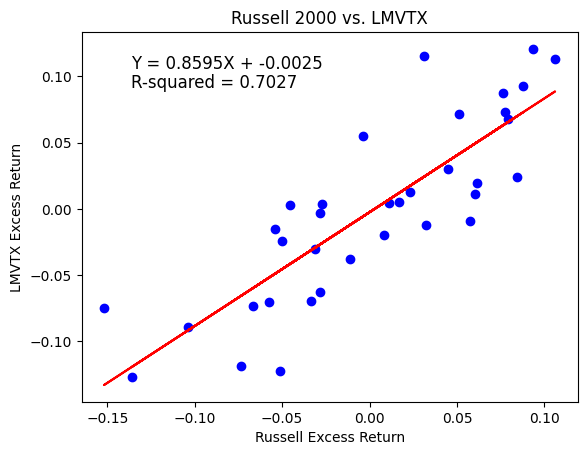

In [ ]:
x = monthly_LM_T_returns['^RUT']
y = monthly_LM_T_returns['LMVTX']
plt.scatter(x, y, color='blue', marker='o')
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label='Regression Line')
equation = f'Y = {slope:.4f}X + {intercept:.4f}'
plt.text(0.1, 0.9, equation, fontsize=12, transform=plt.gca().transAxes)
r_squared = f'R-squared = {r_value**2:.4f}'
plt.text(0.1, 0.85, r_squared, fontsize=12, transform=plt.gca().transAxes)
plt.xlabel('Russell Excess Return')
plt.ylabel('LMVTX Excess Return')
plt.title('Russell 2000 vs. LMVTX')

Text(0.5, 1.0, 'S&P500 vs. LMVTX')

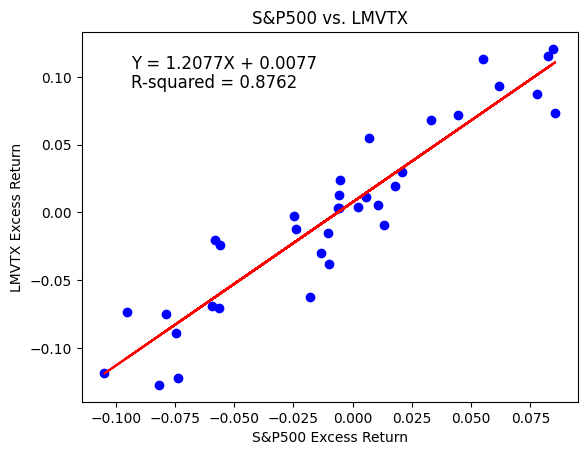

In [ ]:
x = monthly_LM_T_returns['SPY']
y = monthly_LM_T_returns['LMVTX']
plt.scatter(x, y, color='blue', marker='o')
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label='Regression Line')
equation = f'Y = {slope:.4f}X + {intercept:.4f}'
plt.text(0.1, 0.9, equation, fontsize=12, transform=plt.gca().transAxes)
r_squared = f'R-squared = {r_value**2:.4f}'
plt.text(0.1, 0.85, r_squared, fontsize=12, transform=plt.gca().transAxes)
plt.xlabel('S&P500 Excess Return')
plt.ylabel('LMVTX Excess Return')
plt.title('S&P500 vs. LMVTX')